Task 1: import package and load data

In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt

In [2]:
path = 'F:/Sales Reporting/'
dataframe = pd.read_csv(path + 'sales2019_1.csv' )
dataframe.head(10) ## nếu không truyền tham số, mặc định sẽ là 5 dòng


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


#Task 2: clean and preprocess data 

Task 2.1: merge 12-month data

In [3]:
frames = []
all_length  = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file 
        df1= pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)

        # length_1month = len(df1.index) # độ dài 1 tập tin
        # all_length.append(length_1month)
df = result
df.head()
df.to_csv(path + 'annualSales2019.csv', index = False)

Task 2.2: Add "Month" column 

In [4]:
df['Month'] =df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [5]:
print(set(df['Month']))

{'01', '02', nan, 'Or', '05', '04', '06', '07', '08', '11', '09', '03', '12', '10'}


Task 2.3: get rid of 'NaN' and 'or' value

In [6]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [7]:
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


Task 3: reporting

Task 3.1: what was the best month for sales ? how much was earned that month ? 

In [8]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [9]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast ="integer")
df['Price Each']= pd.to_numeric(df['Price Each'], downcast="float")


In [10]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [11]:
moving_column = df.pop('Sales')
df.insert(4,'Sales',moving_column)
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [12]:
df.groupby('Month').sum()['Sales']


Month
01     9111284.0
02    11010112.0
03    14035502.0
04    16953352.0
05    15763034.0
06    12889011.0
07    13238879.0
08    11222339.0
09    10487801.0
10    18683634.0
11    15998016.0
12    23067216.0
Name: Sales, dtype: float32

In [13]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()


23067216.0

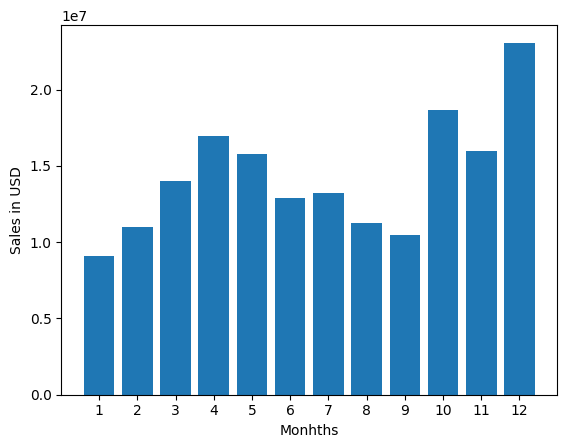

In [14]:
months = range(1,13)
plt.bar(x=months, height= sales_value)
plt.xticks(months)
plt.xlabel('Monhths')
plt.ylabel('Sales in USD')
plt.show()


Task 3.2: What city has the best sales ? 

In [15]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [16]:
# sample_address = '261 10th St, San Fracisco, CA 94016 '
# def getcity(sample_address):
#     return sample_address.split(',')[1]

address_to_city = lambda address:address.split(',')[1]

In [17]:
df['City']= df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [18]:
df.groupby('City').sum()['Sales']

City
Atlanta          13977493.0
Austin            9097909.0
Boston           18308210.0
Dallas           13839877.0
Los Angeles      27262854.0
New York City    23321588.0
Portland         11602453.0
San Francisco    41311020.0
Seattle          13738777.0
Name: Sales, dtype: float32

In [19]:
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max()

In [ ]:
cities = df['City'].unique()

NameError: name 'df' is not defined

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 1 with shape (12,).

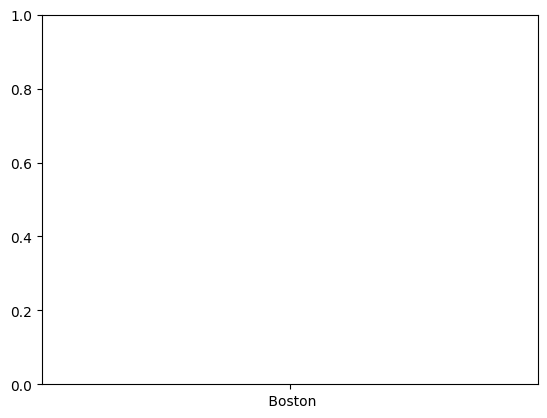

In [ ]:
plt.bar(x=cities, height= sales_value_city)
plt.xticks(cities, rotation =45)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()